In [7]:
#Importing all important libraries
import pandas as pd
import re
import numpy as np
import datetime
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import NearestNeighbors

In [8]:
df = pd.read_excel('Copy of Johannesburg Restaurant Dataset 2.xlsx')
print(df.head())

           Restaurant Name          Category/Cuisine  Price Range  \
0        Marble Restaurant  Steakhouse, Contemporary      R500+pp   
1              La Boqueria                   Spanish  R250–R450pp   
2            Galata Bakery                   Turkish  R100–R250pp   
3         Saint Restaurant                   Italian  R400–R700pp   
4  Momo Ando (Momo Eatery)                  Japanese  R150–R300pp   

                                       Opening Hours               Ratings  \
0                      Monday - Sunday 12:00 - 22:00  4.5/5 (4453 reviews)   
1  Tuesday - Friday 12:00 - 22:00, Saturday 11:00...  4.5/5 (2576 reviews)   
2  Thursday 10:00 - 22:00\nFriday 10:00 - 22:00\n...  4.4/5 (1199 reviews)   
3                      Monday - Sunday 12:00 - 22:30  4.4/5 (2687 reviews)   
4                      Monday - Sunday 11:30 - 21:30   4.3/5 (845 reviews)   

      Contact Number                                            Address  \
0    +27 10 594 5550  Trumpet on Keyes, 1

In [9]:
#Getting an overview description of the data
print(df.describe())

          Restaurant Name Category/Cuisine Price Range  \
count                  72               72          72   
unique                 72               44          33   
top     Marble Restaurant             Café     R500+pp   
freq                    1                8          11   

                        Opening Hours               Ratings    Contact Number  \
count                              72                    72                72   
unique                             67                    72                72   
top     Monday - Sunday 12:00 - 22:00  4.5/5 (4453 reviews)   +27 10 594 5550   
freq                                4                     1                 1   

                                                  Address  \
count                                                  72   
unique                                                 71   
top     44 Stanley Ave, Braamfontein Werf, Johannesbur...   
freq                                                    2  

In [10]:
#Checking for missing values
print(df.isnull())

    Restaurant Name  Category/Cuisine  Price Range  Opening Hours  Ratings  \
0             False             False        False          False    False   
1             False             False        False          False    False   
2             False             False        False          False    False   
3             False             False        False          False    False   
4             False             False        False          False    False   
..              ...               ...          ...            ...      ...   
67            False             False        False          False    False   
68            False             False        False          False    False   
69            False             False        False          False    False   
70            False             False        False          False    False   
71            False             False        False          False    False   

    Contact Number  Address  Ambiance  Peak Hours  Reservations

In [11]:
#Checking for duplicated entries in the restaurant name column to ensure there are no duplicates
duplicate_restaurant_names = df[df['Restaurant Name'].duplicated(keep=False)]
print(duplicate_restaurant_names)

Empty DataFrame
Columns: [Restaurant Name, Category/Cuisine, Price Range, Opening Hours, Ratings, Contact Number, Address, Ambiance, Peak Hours, Reservations, Image Url, Image Url_2]
Index: []


In [12]:
#Extracting restaurant rating and number of reviews to create new columns 'Rating_value' and 'Review_count'
def extract_rating_reviews(value):
    match = re.search(r'(\d\.\d)/5', str(value))  
    reviews_match = re.search(r'\((\d+) reviews\)', str(value))  
    rating = float(match.group(1)) if match else None
    reviews = int(reviews_match.group(1)) if reviews_match else None
    return rating, reviews

df[['Rating_Value', 'Review_Count']] = df['Ratings'].apply(lambda x: pd.Series(extract_rating_reviews(x)))
df.drop(columns=['Ratings'], inplace=True)
df.head()

,Restaurant Name,Category/Cuisine,Price Range,Opening Hours,Contact Number,Address,Ambiance,Peak Hours,Reservations,Image Url,Image Url_2,Rating_Value,Review_Count
0,Marble Restaurant,"Steakhouse, Contemporary",R500+pp,Monday - Sunday 12:00 - 22:00,+27 10 594 5550,"Trumpet on Keyes, 19 Keyes Ave, Rosebank, Joha...","Known for its modern, elegant aesthetic with a...","Dinner Peak: 6:30 PM – 9:30 PM, with Friday an...",https://marble.restaurant/main-restaurant/,"<blockquote class=""instagram-media"" data-instg...","<blockquote class=""instagram-media"" data-instg...",4.5,4453.0
1,La Boqueria,Spanish,R250–R450pp,"Tuesday - Friday 12:00 - 22:00, Saturday 11:00...",+27 76 997 3263,"17 4th Avenue, Parktown North, Johannesburg, 2193","This restaurant has a lively, eclectic ambianc...",Brunch/Lunch Peak: 11:00 AM – 2:30 PM on weeke...,reservations@laboqueria.co.za,"<blockquote class=""instagram-media"" data-instg...","<blockquote class=""instagram-media"" data-instg...",4.5,2576.0
2,Galata Bakery,Turkish,R100–R250pp,Thursday 10:00 - 22:00\nFriday 10:00 - 22:00\n...,683619254,"51 Church St, Mayfair, Johannesburg, 2092","A more relaxed, welcoming bakery-café with a c...","Morning Peak: 8:00 AM – 10:30 AM, especially o...",not required,"<blockquote class=""instagram-media"" data-instg...","<blockquote class=""instagram-media"" data-instg...",4.4,1199.0
3,Saint Restaurant,Italian,R400–R700pp,Monday - Sunday 12:00 - 22:30,105945888,"The Marc, 129 Rivonia Road, Sandton, Johannesb...","Known for its opulent and stylish design, Sain...",Lunch Peak: 12:30 PM – 2:30 PM.\nDinner Peak: ...,https://www.dineplan.com/restaurants/saint-res...,"<blockquote class=""instagram-media"" data-instg...","<blockquote class=""instagram-media"" data-instg...",4.4,2687.0
4,Momo Ando (Momo Eatery),Japanese,R150–R300pp,Monday - Sunday 11:30 - 21:30,879805843,"12 Gleneagles Rd, Greenside, Johannesburg, 2193","Momo Ando is a trendy, casual spot with a mini...",Lunch Peak: 12:00 PM – 2:00 PM.\nDinner Peak: ...,not required,"<blockquote class=""instagram-media"" data-instg...","<blockquote class=""instagram-media"" data-instg...",4.3,845.0


### Extracting restaurant rating and number of reviews to create new columns 'Rating_value' and 'Review_count'
def extract_rating_reviews(value):
    match = re.search(r'(\d\.\d)/5', str(value))  
    reviews_match = re.search(r'\((\d+) reviews\)', str(value))  
    rating = float(match.group(1)) if match else None
    reviews = int(reviews_match.group(1)) if reviews_match else None
    return rating, reviews

df[['Rating_Value', 'Review_Count']] = df['Ratings'].apply(lambda x: pd.Series(extract_rating_reviews(x)))
df.drop(columns=['Ratings'], inplace=True)
df.head()

In [13]:
#Checking for missing values in the 'Rating_Value' column
print(df['Rating_Value'].isnull().sum())

1


In [14]:
#Filling the missing 'rating_value' with correct rating and 'review_count'
df.loc[df['Restaurant Name'] == 'Chunky Chau Rosebank', 'Rating_Value'] = 4.5
df.loc[df['Restaurant Name'] == 'Chunky Chau Rosebank', 'Review_Count'] = 467
print(df['Rating_Value'].isnull().sum())

0


In [15]:
#Normalizing Rating_Value for machine learning model use
# Initialize MinMaxScaler
scaler = MinMaxScaler()
df["Rating_Value_Normalized"] = scaler.fit_transform(df[["Rating_Value"]])
print(df['Rating_Value_Normalized'])

0     0.583333
1     0.583333
2     0.500000
3     0.500000
4     0.416667
        ...   
67    0.583333
68    0.500000
69    0.666667
70    0.583333
71    0.750000
Name: Rating_Value_Normalized, Length: 72, dtype: float64


In [16]:
#Feature Engineering: Extracting minimum price range per person and max price range per person from 'Price Range' column
def extract_price_range(value):
    match = re.findall(r'\d+', str(value))  

    if "R" in str(value) and "+" in str(value):  
        return int(match[0]), 1000  

    elif len(match) == 2: 
        return int(match[0]), int(match[1])  

    elif len(match) == 1:  
        return int(match[0]), int(match[0])  

    else:
        return None, None  

df[['Avg_Min_Price', 'Avg_Max_Price']] = df['Price Range'].apply(lambda x: pd.Series(extract_price_range(x)))
df.drop(columns=['Price Range'], inplace=True)
print(df.head())

           Restaurant Name          Category/Cuisine  \
0        Marble Restaurant  Steakhouse, Contemporary   
1              La Boqueria                   Spanish   
2            Galata Bakery                   Turkish   
3         Saint Restaurant                   Italian   
4  Momo Ando (Momo Eatery)                  Japanese   

                                       Opening Hours     Contact Number  \
0                      Monday - Sunday 12:00 - 22:00    +27 10 594 5550   
1  Tuesday - Friday 12:00 - 22:00, Saturday 11:00...   +27 76 997 3263    
2  Thursday 10:00 - 22:00\nFriday 10:00 - 22:00\n...          683619254   
3                      Monday - Sunday 12:00 - 22:30          105945888   
4                      Monday - Sunday 11:30 - 21:30          879805843   

                                             Address  \
0  Trumpet on Keyes, 19 Keyes Ave, Rosebank, Joha...   
1  17 4th Avenue, Parktown North, Johannesburg, 2193   
2          51 Church St, Mayfair, Johannesbu

In [17]:
#Normalizing the 'Avg_Min_Price' and 'Avg_Max_Price' for future machine learning model work
scaler = MinMaxScaler()
df["Avg_Min_Price_Normalized"] = scaler.fit_transform(df[["Avg_Min_Price"]])
print(df['Avg_Min_Price_Normalized'])
df["Avg_Max_Price_Normalized"] = scaler.fit_transform(df[["Avg_Max_Price"]])
print(df['Avg_Max_Price_Normalized'])

0     0.666667
1     0.250000
2     0.000000
3     0.500000
4     0.083333
        ...   
67    0.083333
68    0.083333
69    0.666667
70    0.666667
71    0.666667
Name: Avg_Min_Price_Normalized, Length: 72, dtype: float64
0     1.000000
1     0.352941
2     0.117647
3     0.647059
4     0.176471
        ...   
67    0.117647
68    0.117647
69    1.000000
70    1.000000
71    1.000000
Name: Avg_Max_Price_Normalized, Length: 72, dtype: float64


In [18]:
#Checking for any missing values and reviews_count
print(df['Review_Count'].isnull().sum())

3


In [19]:
# Get the indices of rows with null Review_Count values
missing_review_indices = df.index[df['Review_Count'].isnull()].tolist()

print(f"Restaurants with missing review counts (rows {missing_review_indices}):")

for idx in missing_review_indices:
    print(f"\nRow {idx}:")
    print(df.loc[idx])

Restaurants with missing review counts (rows [49, 50, 57]):

Row 49:
Restaurant Name                                      La Pergola at 44 STANLEY
Category/Cuisine                                                     Italian 
Opening Hours               Monday Closed, Tuesday - Saturday 11:00 - 22:0...
Contact Number                                                      871100626
Address                     44 Stanley Ave, Braamfontein Werf, Johannesbur...
Ambiance                     La Pergola at 44 Stanley has an elegant and s...
Peak Hours                  Dinner hours on Friday and Saturday evenings (...
Reservations                         https://www.lapergola.co.za/reservations
Image Url                   <blockquote class="instagram-media" data-instg...
Image Url_2                 <blockquote class="instagram-media" data-instg...
Rating_Value                                                              4.0
Review_Count                                                             

In [20]:
# Update the missing review counts with the correct values
df.loc[49, 'Review_Count'] = 237
df.loc[50, 'Review_Count'] = 2737
df.loc[57, 'Review_Count'] = 127

# Check if any review counts are still missing
df['Review_Count'].isnull().sum()


np.int64(0)

In [21]:
#Normalizing 'Review_Count' for future machine learning model work
print(df['Review_Count'])
scaler = MinMaxScaler()
df["Review_Count_Normalized"] = scaler.fit_transform(df[["Review_Count"]])
print(df["Review_Count_Normalized"])

0     4453.0
1     2576.0
2     1199.0
3     2687.0
4      845.0
       ...  
67    3719.0
68    1431.0
69    1231.0
70     909.0
71      59.0
Name: Review_Count, Length: 72, dtype: float64
0     1.000000
1     0.577443
2     0.267447
3     0.602431
4     0.187753
        ...   
67    0.834759
68    0.319676
69    0.274651
70    0.202161
71    0.010806
Name: Review_Count_Normalized, Length: 72, dtype: float64


In [22]:
print(df['Contact Number'])

0       +27 10 594 5550
1      +27 76 997 3263 
2             683619254
3             105945888
4             879805843
            ...        
67            116842999
68            100250436
69            112523300
70            876554480
71            725686894
Name: Contact Number, Length: 72, dtype: object


In [23]:
#converting contact number to correct format, fixing inconsistent formatting
def clean_phone_number(number):
    if pd.isna(number) or number == "Not Available":  
        return number  
    
    # Remove spaces, newlines, and any non-numeric character except '+'
    number = re.sub(r'[^\d+]', '', str(number))

    # Converting numbers that starts with '0' and convert to +27 format
    if number.startswith("0"):
        number = "+27" + number[1:]

    # If number doesn't start with +27 and has 9 digits, assume it's a local mobile number
    elif len(number) == 9:
        number = "+27" + number

    # Formatting numbers correctly into +27 XX XXX XXXX
    if number.startswith("+27") and len(number) >= 11:
        formatted_number = "+27 " + number[3:5] + " " + number[5:8] + " " + number[8:]
        return formatted_number
    
    return number  


df["Contact Number"] = df["Contact Number"].apply(clean_phone_number)
print(df['Contact Number'])

0     +27 10 594 5550
1     +27 76 997 3263
2     +27 68 361 9254
3     +27 10 594 5888
4     +27 87 980 5843
           ...       
67    +27 11 684 2999
68    +27 10 025 0436
69    +27 11 252 3300
70    +27 87 655 4480
71    +27 72 568 6894
Name: Contact Number, Length: 72, dtype: object


In [24]:
print(df['Contact Number'].isnull())

0     False
1     False
2     False
3     False
4     False
      ...  
67    False
68    False
69    False
70    False
71    False
Name: Contact Number, Length: 72, dtype: bool


In [25]:
def check_phone_formats(df):
    correct_pattern = r'^\+27\s\d{2}\s\d{3}\s\d{4}$'
    
    # Create a boolean mask of entries that don't match the pattern
    # Excluding "Not Available" entries since those are valid as-is
    invalid_mask = (~df["Contact Number"].str.match(correct_pattern, na=False)) & (df["Contact Number"] != "Not Available") & (~df["Contact Number"].isna())
    
    invalid_numbers = df.loc[invalid_mask, "Contact Number"]
    
    print(f"Found {len(invalid_numbers)} contact numbers with invalid format:")
    
    # Printing the invalid numbers with their indices for easy reference
    for idx, number in invalid_numbers.items():
        print(f"Row {idx}: {number}")
    
    return invalid_mask

invalid_mask = check_phone_formats(df)


Found 5 contact numbers with invalid format:
Row 26: +27 01 188 02244
Row 31: 27656534913
Row 42: 
Row 48: +33609215148
Row 56: 1606979695


In [26]:
df.loc[26, 'Contact Number'] = "+27 18 880 2244"
df.loc[31, 'Contact Number'] = "+27 65 653 4913"
df.loc[42, 'Contact Number'] = "Not Available"
df.loc[48, 'Contact Number'] = "+33 60 921 5148"
df.loc[56, 'Contact Number'] = "Not Available"

def check_phone_formats_again(df):
    sa_pattern = r'^\+27\s\d{2}\s\d{3}\s\d{4}$'
    international_pattern = r'^\+\d{2}\s\d{2}\s\d{3}\s\d{4}$'
    invalid_mask = (~df["Contact Number"].str.match(sa_pattern, na=False)) & \
                  (~df["Contact Number"].str.match(international_pattern, na=False)) & \
                  (df["Contact Number"] != "Not Available") & \
                  (~df["Contact Number"].isna()) & \
                  (df["Contact Number"] != "")
    
    invalid_numbers = df.loc[invalid_mask, "Contact Number"]
    
    print(f"\nAfter fixes, {len(invalid_numbers)} contact numbers still have invalid format:")
    for idx, number in invalid_numbers.items():
        print(f"Row {idx}: {number}")
    
    return invalid_mask

In [27]:
#Feature Engineering: Extracting Suburb from address for future analysis and clustering
def extract_suburb(address):
    match = re.search(r',\s([^,]+),\sJohannesburg', address)
    if match:
        return match.group(1)
    return None

df['Suburb'] = df['Address'].apply(extract_suburb)
print(df[df['Suburb'].isna()])
print(df[['Address', 'Suburb']])

                           Restaurant Name  \
19                    The Fat Zebra Linden   
20                             Nice on 4th   
21                                    Paul   
26                 Cnr Café Bisro and Deli   
27                   The Whippet in Linden   
28                            Café Billibi   
29               Oregano Coffee and Brunch   
32                              Dolci Café   
33                              Croft & co   
36             Olives and Plates Hyde Park   
38                Delta Cafe & Don Quixote   
50                        The Rock Kyalami   
52                 Solo Restaurant Sandton   
53                          Culinary Table   
57                        The Potluck Club   
59  Yamitsuki Sushi Teppanyaki Dim sum Bar   
60              The Bigmouth Sushi & Grill   
62                            The Blockman   
63                  Kolonaki Greek Kouzina   
64               The Fussy Vegan Greenside   
65                Ground Cafe Muld

In [28]:
#Corrections for Suburbs without a valid entry
suburb_updates = {
    19: 'Linden',
    20: 'Parkhurst',
    21: 'Melrose Arch',
    26: 'Craighall Park',
    27: 'Linden',
    28: 'Bedfordview',
    29: 'Northcliff',
    32: 'Craighall Park',
    33: 'Parkview',
    36: 'Hyde Park',
    38: 'Craighall Park',
    50: 'Kyalami',
    52: 'Sandton',
    53: 'Lanseria',
    57: 'Rosebank',
    59: 'Bedfordview',
    60: 'Sandton',
    62: 'Parkwood',
    63: 'Parkhurst',
    64: 'Greenside',
    65: 'Muldersdrift',
    70: 'Linden',
    71: 'Craighall Park'
}
for index, suburb in suburb_updates.items():
    df.at[index, 'Suburb'] = suburb

print(df['Suburb'])
df['Suburb'].isnull()

0           Rosebank
1     Parktown North
2            Mayfair
3            Sandton
4          Greenside
           ...      
67           Melrose
68           Sandown
69          Rosebank
70            Linden
71    Craighall Park
Name: Suburb, Length: 72, dtype: object


0     False
1     False
2     False
3     False
4     False
      ...  
67    False
68    False
69    False
70    False
71    False
Name: Suburb, Length: 72, dtype: bool

In [29]:
# One Hot-Encoding 'Suburb' column
df = pd.get_dummies(df, columns=['Suburb'])
print(df.head(5))


           Restaurant Name          Category/Cuisine  \
0        Marble Restaurant  Steakhouse, Contemporary   
1              La Boqueria                   Spanish   
2            Galata Bakery                   Turkish   
3         Saint Restaurant                   Italian   
4  Momo Ando (Momo Eatery)                  Japanese   

                                       Opening Hours   Contact Number  \
0                      Monday - Sunday 12:00 - 22:00  +27 10 594 5550   
1  Tuesday - Friday 12:00 - 22:00, Saturday 11:00...  +27 76 997 3263   
2  Thursday 10:00 - 22:00\nFriday 10:00 - 22:00\n...  +27 68 361 9254   
3                      Monday - Sunday 12:00 - 22:30  +27 10 594 5888   
4                      Monday - Sunday 11:30 - 21:30  +27 87 980 5843   

                                             Address  \
0  Trumpet on Keyes, 19 Keyes Ave, Rosebank, Joha...   
1  17 4th Avenue, Parktown North, Johannesburg, 2193   
2          51 Church St, Mayfair, Johannesburg, 2092   


In [30]:
#Applying One-Hot Encoding to 'Reservations' column to ensure its effective use in machine learning model
def is_reservation_required(reservation):
    reservation = str(reservation) if not isinstance(reservation, str) else reservation
    
    if 'http' in reservation or reservation.isnumeric() or '@' in reservation:
        return 1  
    elif 'not required' in reservation.lower():
        return 0  
    return 0  

df['ReservationRequired'] = df['Reservations'].apply(is_reservation_required)
print(df['ReservationRequired'])

0     1
1     1
2     0
3     1
4     0
     ..
67    1
68    1
69    1
70    1
71    1
Name: ReservationRequired, Length: 72, dtype: int64


In [31]:
#Converting all entries in the 'Category/Cuisine' column to lowercase
df['Category/Cuisine'] = df['Category/Cuisine'].str.lower()
print(df['Category/Cuisine'])

0                steakhouse, contemporary
1                                 spanish
2                                 turkish
3                                 italian
4                                japanese
                     ...                 
67           meditteranean, south african
68            modern, vegetarian friendly
69                           contemporary
70    latin american, asian mediterranean
71                           contemporary
Name: Category/Cuisine, Length: 72, dtype: object


In [32]:
#One-Hot encoding 'Category/Cuisine'
def clean_and_one_hot_encode(df, column_name):
    """Cleans the specified category column and performs one-hot encoding."""

    def process_categories(categories_str):
        if isinstance(categories_str, str):
            categories = [c.strip().lower() for c in categories_str.split(',')]
            cleaned_categories = []
            for category in categories:
                if category == "meditteranean":
                    category = "mediterranean"
                elif category == "cofee shop":
                    category = "coffee shop"
                elif category == "geek":
                    category = "greek"
                elif category == "cafe":
                    category = "café"  
                
                if category in ["flamed"]:
                    continue
                    
                cleaned_categories.append(category)
            return cleaned_categories
        else:
            return []
           
    df[column_name] = df[column_name].apply(process_categories)
    df = df.explode(column_name)
    df = pd.get_dummies(df, columns=[column_name], prefix='', prefix_sep='')
    df = df.groupby(df.index).max()

    return df
df = clean_and_one_hot_encode(df, 'Category/Cuisine')
print(df.head(5))

           Restaurant Name                                      Opening Hours  \
0        Marble Restaurant                      Monday - Sunday 12:00 - 22:00   
1              La Boqueria  Tuesday - Friday 12:00 - 22:00, Saturday 11:00...   
2            Galata Bakery  Thursday 10:00 - 22:00\nFriday 10:00 - 22:00\n...   
3         Saint Restaurant                      Monday - Sunday 12:00 - 22:30   
4  Momo Ando (Momo Eatery)                      Monday - Sunday 11:30 - 21:30   

    Contact Number                                            Address  \
0  +27 10 594 5550  Trumpet on Keyes, 19 Keyes Ave, Rosebank, Joha...   
1  +27 76 997 3263  17 4th Avenue, Parktown North, Johannesburg, 2193   
2  +27 68 361 9254          51 Church St, Mayfair, Johannesburg, 2092   
3  +27 10 594 5888  The Marc, 129 Rivonia Road, Sandton, Johannesb...   
4  +27 87 980 5843    12 Gleneagles Rd, Greenside, Johannesburg, 2193   

                                            Ambiance  \
0  Known for its m

In [50]:
for col in df.columns:
    if df[col].dtype == 'bool': 
        df[col] = df[col].astype(int)

print(df.columns)  
print(df)

Index(['Restaurant Name', 'Opening Hours', 'Contact Number', 'Address',
       'Ambiance', 'Reservations', 'Image Url', 'Image Url_2', 'Rating_Value',
       'Review_Count', 'Rating_Value_Normalized', 'Avg_Min_Price',
       'Avg_Max_Price', 'Avg_Min_Price_Normalized', 'Avg_Max_Price_Normalized',
       'Review_Count_Normalized', 'Suburb_Bedfordview', 'Suburb_Birnam',
       'Suburb_Braamfontein', 'Suburb_Braamfontein Werf', 'Suburb_Bryanston',
       'Suburb_City and Suburban', 'Suburb_Craighall Park', 'Suburb_Dunkeld',
       'Suburb_Ferreiras Dorp', 'Suburb_Fourways', 'Suburb_Fulham Road',
       'Suburb_Greenside', 'Suburb_Greenstone Hill', 'Suburb_Hyde Park',
       'Suburb_Illovo', 'Suburb_Jeppestown', 'Suburb_Kyalami',
       'Suburb_Lanseria', 'Suburb_Linden', 'Suburb_Maboneng', 'Suburb_Mayfair',
       'Suburb_Melrose', 'Suburb_Melrose Arch', 'Suburb_Melrose North',
       'Suburb_Melville', 'Suburb_Milpark', 'Suburb_Muldersdrift',
       'Suburb_New Doornfontein', 'Suburb_Nor

In [34]:
#Standardizing Restaurant Name Column
df['Restaurant Name'] = df['Restaurant Name'].str.strip()  # Remove leading/trailing spac
df['Restaurant Name'] = df['Restaurant Name'].str.replace(r"\n", " ", regex=True)  # Remove newline characters
df['Restaurant Name'] = df['Restaurant Name'].str.title()  # Capitalize each word
print(df['Restaurant Name'])

0           Marble Restaurant
1                 La Boqueria
2               Galata Bakery
3            Saint Restaurant
4     Momo Ando (Momo Eatery)
               ...           
67                 Mr. George
68       Truffles On The Park
69               Sec Rosebank
70                     Gaucho
71            Alma Restaurant
Name: Restaurant Name, Length: 72, dtype: object


In [35]:
print(df['Opening Hours'])

0                         Monday - Sunday 12:00 - 22:00
1     Tuesday - Friday 12:00 - 22:00, Saturday 11:00...
2     Thursday 10:00 - 22:00\nFriday 10:00 - 22:00\n...
3                         Monday - Sunday 12:00 - 22:30
4                         Monday - Sunday 11:30 - 21:30
                            ...                        
67    Monday - Wednesday 11:00 - 21:30, Thursday - S...
68    Monday - Friday 12:00 - 22:00, Saturday 10:00 ...
69    Monday - Saturday 12:30 - 15:30, 17:30 - 21:00...
70    Monday - Friday 11 :00 - 22:00, Saturday 9:00 ...
71                        Monday - Sunday 12:00 - 22:00
Name: Opening Hours, Length: 72, dtype: object


In [36]:
#Cleaning Opening Hours Column
def clean_times(text):
    text = text.replace("\n", "; ")
    return text
df["Opening Hours"] = df["Opening Hours"].apply(clean_times)
print(df['Opening Hours'])

0                         Monday - Sunday 12:00 - 22:00
1     Tuesday - Friday 12:00 - 22:00, Saturday 11:00...
2     Thursday 10:00 - 22:00; Friday 10:00 - 22:00; ...
3                         Monday - Sunday 12:00 - 22:30
4                         Monday - Sunday 11:30 - 21:30
                            ...                        
67    Monday - Wednesday 11:00 - 21:30, Thursday - S...
68    Monday - Friday 12:00 - 22:00, Saturday 10:00 ...
69    Monday - Saturday 12:30 - 15:30, 17:30 - 21:00...
70    Monday - Friday 11 :00 - 22:00, Saturday 9:00 ...
71                        Monday - Sunday 12:00 - 22:00
Name: Opening Hours, Length: 72, dtype: object


In [37]:
# Preprocessing restaurant ambiance descriptions by removing common stopwords and punctuation, then extracts the most important keywords using TF-IDF.
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
# Define our own stopwords list - make it a list, not a set
custom_stopwords = [
    'a', 'an', 'the', 'and', 'but', 'or', 'for', 'nor', 'on', 'at', 'to', 'by', 
    'from', 'this', 'that', 'in', 'of', 'is', 'are', 'was', 'were', 'be', 'been',
    'being', 'have', 'has', 'had', 'do', 'does', 'did', 'can', 'could', 'will',
    'would', 'should', 'shall', 'may', 'might', 'must', 'with', 'within', 'its',
    'it', 'restaurant', 'offers', 'featuring', 'known', 'has', 'which', 'where'
]

def preprocess_text(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    words = text.split()
    words = [word for word in words if word not in custom_stopwords]
    return ' '.join(words)

# Vectorizing without TF-IDF (pure word frequency)
count_vectorizer = CountVectorizer(
    stop_words=custom_stopwords, 
    max_features=100,  
    ngram_range=(1, 2)  
)
count_matrix = count_vectorizer.fit_transform(df['Ambiance'].apply(preprocess_text))

# LDA Topic Modeling
lda = LatentDirichletAllocation(n_components=5, random_state=42)  # 5 topics
lda.fit(count_matrix)

# Extract Top Words for Each Topic
feature_names = count_vectorizer.get_feature_names_out()
topics = {}
for topic_idx, topic in enumerate(lda.components_):
    top_keywords = [feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]
    topics[f'Topic {topic_idx+1}'] = top_keywords

# Display topics and keywords
for topic, keywords in topics.items():
    print(f"{topic}: {', '.join(keywords)}")
    

Topic 1: atmosphere, vibrant, experience, dining, out, ideal, vibrant atmosphere, evenings, menu, lively
Topic 2: sophisticated, sushi, decor, stylish, elegant, dishes, spot, contemporary, dining, plantbased
Topic 3: dining, ambiance, experience, dining experience, modern, setting, perfect, cozy, warm, decor
Topic 4: focus, atmosphere, inviting, inviting atmosphere, cuisine, atmosphere focus, delicious, warm inviting, traditional, warm
Topic 5: atmosphere, popular, spot, atmosphere popular, brunch, popular spot, spot brunch, lunch, brunch lunch, café


In [45]:
# Assign dominant topic to each restaurant
topic_distributions = lda.transform(count_matrix)
df['Ambiance_Category'] = topic_distributions.argmax(axis=1)

# Map topic numbers to ambiance labels
ambiance_labels = {
    0: "Lively & Vibrant Dining",
    1: "Elegant & Contemporary Dining",
    2: "Modern & Cozy Dining",
    3: "Traditional & Inviting Atmosphere",
    4: "Popular Brunch & Café Spot"
}

df['Ambiance_Label'] = df['Ambiance_Category'].map(ambiance_labels)
# Display results with restaurant name and ambiance label
print(df[['Restaurant Name', 'Ambiance_Label']])

            Restaurant Name                     Ambiance_Label
0         Marble Restaurant      Elegant & Contemporary Dining
1               La Boqueria               Modern & Cozy Dining
2             Galata Bakery               Modern & Cozy Dining
3          Saint Restaurant               Modern & Cozy Dining
4   Momo Ando (Momo Eatery)               Modern & Cozy Dining
..                      ...                                ...
67               Mr. George      Elegant & Contemporary Dining
68     Truffles On The Park               Modern & Cozy Dining
69             Sec Rosebank               Modern & Cozy Dining
70                   Gaucho  Traditional & Inviting Atmosphere
71          Alma Restaurant               Modern & Cozy Dining

[72 rows x 2 columns]


In [46]:
print(df['Ambiance_Label'].isnull().sum())

0


In [47]:
restaurant_name = 'Sec Rosebank'

# Finding the ambiance label for the specific restaurant
ambiance_label = df[df['Restaurant Name'] == restaurant_name]['Ambiance_Label'].iloc[0]

# Display the ambiance label
print(f"The ambiance label for '{restaurant_name}' is: {ambiance_label}")

The ambiance label for 'Sec Rosebank' is: Modern & Cozy Dining


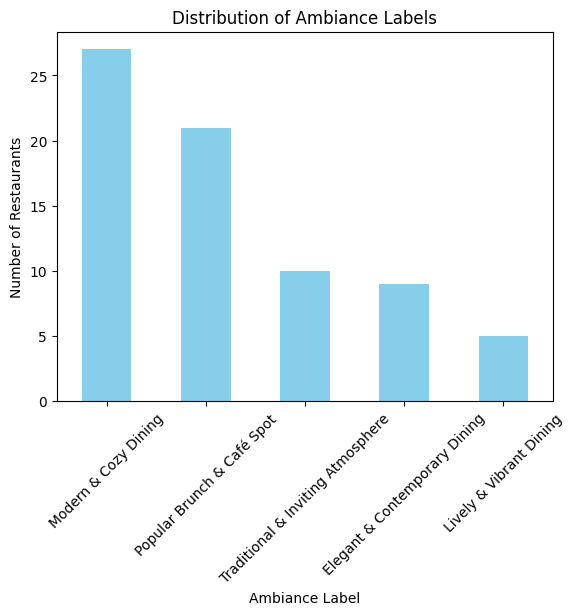

In [48]:
# Plot tdistribution of ambiance labels
ambiance_counts = df['Ambiance_Label'].value_counts()
ambiance_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Ambiance Labels')
plt.xlabel('Ambiance Label')
plt.ylabel('Number of Restaurants')
plt.xticks(rotation=45)
plt.show()

In [38]:
# Converting boolean columns to '1' and '0' as strings
df = df.applymap(lambda x: '1' if x is True else ('0' if x is False else x))

print(df.head(5))

           Restaurant Name                                      Opening Hours  \
0        Marble Restaurant                      Monday - Sunday 12:00 - 22:00   
1              La Boqueria  Tuesday - Friday 12:00 - 22:00, Saturday 11:00...   
2            Galata Bakery  Thursday 10:00 - 22:00; Friday 10:00 - 22:00; ...   
3         Saint Restaurant                      Monday - Sunday 12:00 - 22:30   
4  Momo Ando (Momo Eatery)                      Monday - Sunday 11:30 - 21:30   

    Contact Number                                            Address  \
0  +27 10 594 5550  Trumpet on Keyes, 19 Keyes Ave, Rosebank, Joha...   
1  +27 76 997 3263  17 4th Avenue, Parktown North, Johannesburg, 2193   
2  +27 68 361 9254          51 Church St, Mayfair, Johannesburg, 2092   
3  +27 10 594 5888  The Marc, 129 Rivonia Road, Sandton, Johannesb...   
4  +27 87 980 5843    12 Gleneagles Rd, Greenside, Johannesburg, 2193   

                                            Ambiance  \
0  Known for its m

C:\Users\Game\AppData\Local\Temp\ipykernel_15160\792568706.py:2: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: '1' if x is True else ('0' if x is False else x))


In [49]:
df = df.drop('Peak Hours', axis=1)
for col in df.columns:
    if df[col].dtype == 'bool': 
        df[col] = df[col].astype(int)

print(df.columns)  
print(df)

Index(['Restaurant Name', 'Opening Hours', 'Contact Number', 'Address',
       'Ambiance', 'Reservations', 'Image Url', 'Image Url_2', 'Rating_Value',
       'Review_Count', 'Rating_Value_Normalized', 'Avg_Min_Price',
       'Avg_Max_Price', 'Avg_Min_Price_Normalized', 'Avg_Max_Price_Normalized',
       'Review_Count_Normalized', 'Suburb_Bedfordview', 'Suburb_Birnam',
       'Suburb_Braamfontein', 'Suburb_Braamfontein Werf', 'Suburb_Bryanston',
       'Suburb_City and Suburban', 'Suburb_Craighall Park', 'Suburb_Dunkeld',
       'Suburb_Ferreiras Dorp', 'Suburb_Fourways', 'Suburb_Fulham Road',
       'Suburb_Greenside', 'Suburb_Greenstone Hill', 'Suburb_Hyde Park',
       'Suburb_Illovo', 'Suburb_Jeppestown', 'Suburb_Kyalami',
       'Suburb_Lanseria', 'Suburb_Linden', 'Suburb_Maboneng', 'Suburb_Mayfair',
       'Suburb_Melrose', 'Suburb_Melrose Arch', 'Suburb_Melrose North',
       'Suburb_Melville', 'Suburb_Milpark', 'Suburb_Muldersdrift',
       'Suburb_New Doornfontein', 'Suburb_Nor

C:\Users\Game\AppData\Local\Temp\ipykernel_15160\1233362678.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette="viridis")


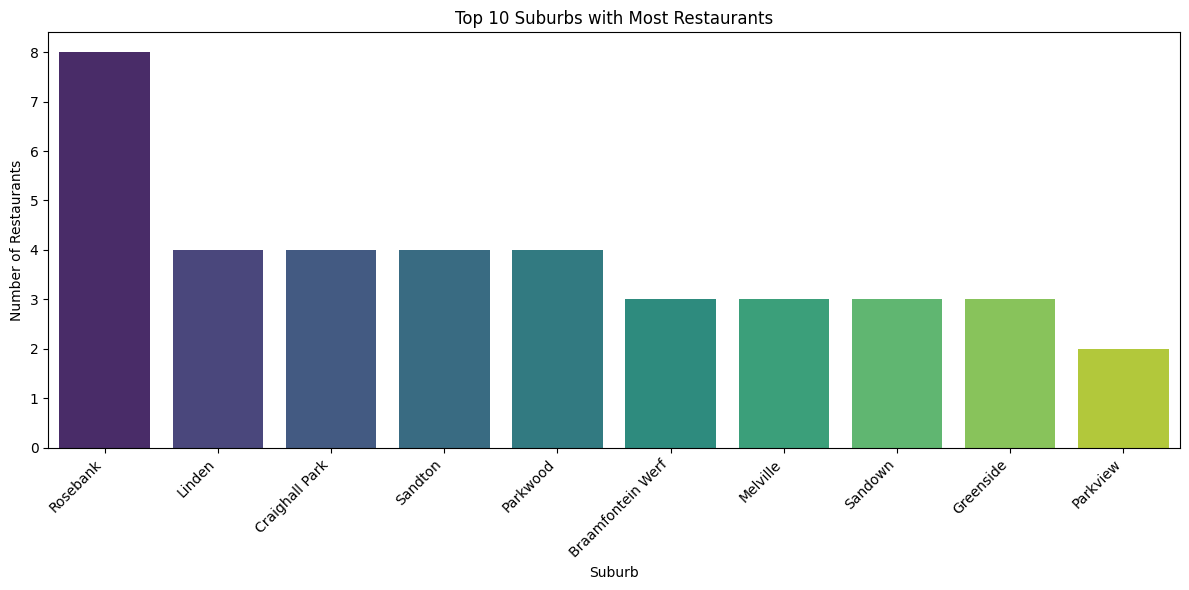

In [39]:
#Visualizing top 10 suburbs with the most amount restaurants
suburb_columns = [col for col in df.columns if col.startswith('Suburb_')]
suburb_counts = {}
for col in suburb_columns:
    suburb_name = col.replace('Suburb_', '')
    count = df[col].sum()
    suburb_counts[suburb_name] = count

suburb_series = pd.Series(suburb_counts)

top_suburbs = suburb_series.sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_suburbs.index, y=top_suburbs.values, palette="viridis")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Suburb")
plt.ylabel("Number of Restaurants")
plt.title("Top 10 Suburbs with Most Restaurants")
plt.tight_layout()  
plt.show()

C:\Users\Game\AppData\Local\Temp\ipykernel_15160\3330382330.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_rated_suburbs.index, y=top_rated_suburbs.values, palette="coolwarm")


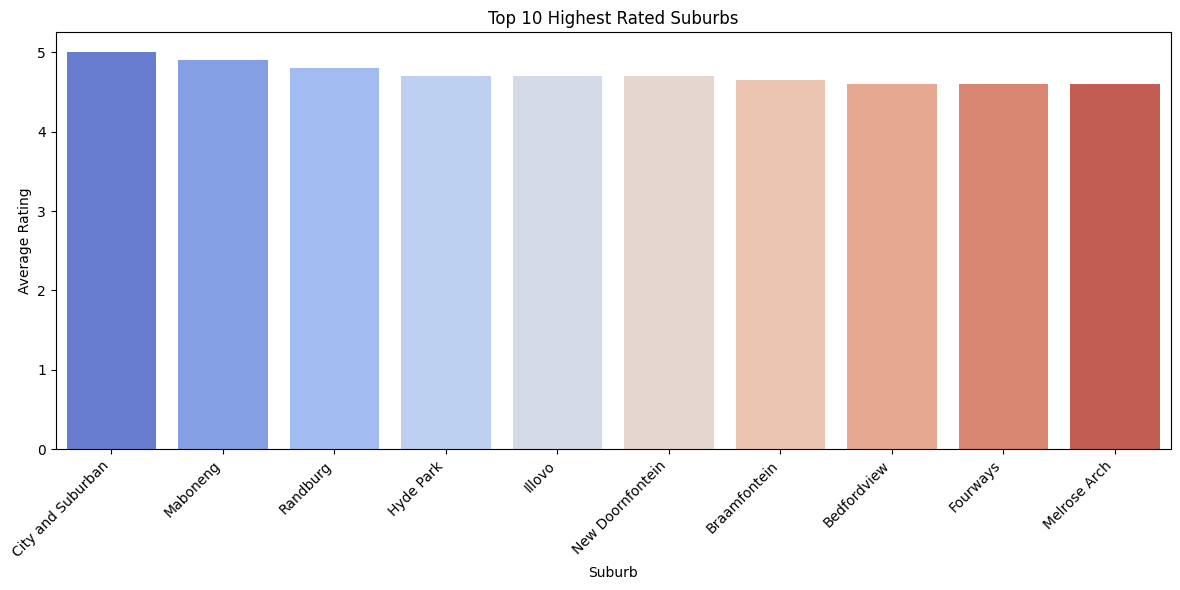

In [40]:
#Visualizing suburbs with the most top rated suburbs
suburb_columns = [col for col in df.columns if col.startswith('Suburb_')]

suburb_ratings = {}
for col in suburb_columns:
    suburb_name = col.replace('Suburb_', '')
    suburb_restaurants = df[df[col] == 1]
    if len(suburb_restaurants) > 0:  
        avg_rating = suburb_restaurants['Rating_Value'].mean()
        suburb_ratings[suburb_name] = avg_rating

suburb_rating_series = pd.Series(suburb_ratings)

top_rated_suburbs = suburb_rating_series.sort_values(ascending=False)[:10]

plt.figure(figsize=(12, 6))
sns.barplot(x=top_rated_suburbs.index, y=top_rated_suburbs.values, palette="coolwarm")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Suburb")
plt.ylabel("Average Rating")
plt.title("Top 10 Highest Rated Suburbs")
plt.tight_layout()  
plt.show()

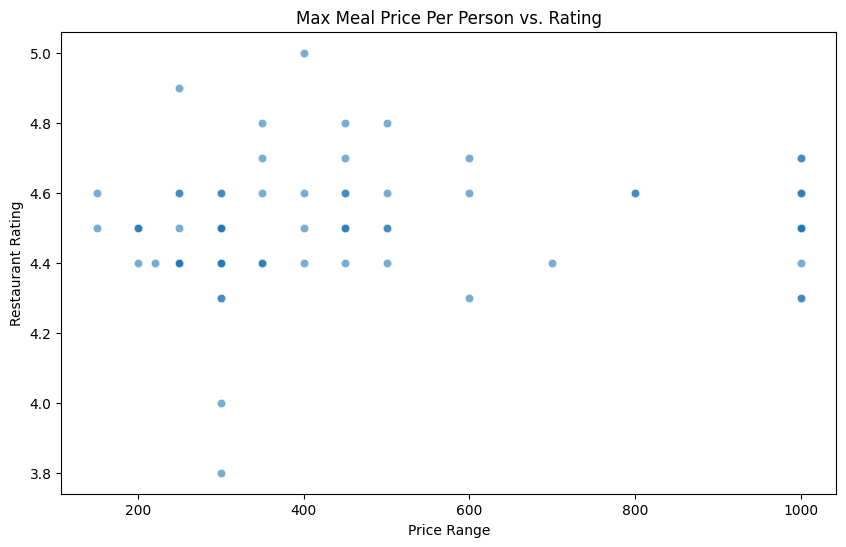

In [41]:
#Price vs. Rating
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Avg_Max_Price'], y=df['Rating_Value'], alpha=0.6)
plt.xlabel("Price Range")
plt.ylabel("Restaurant Rating")
plt.title("Max Meal Price Per Person vs. Rating")
plt.show()

C:\Users\Game\AppData\Local\Temp\ipykernel_15160\3050313840.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_reviews['Restaurant Name'], y=top_reviews['Review_Count'], palette="flare")


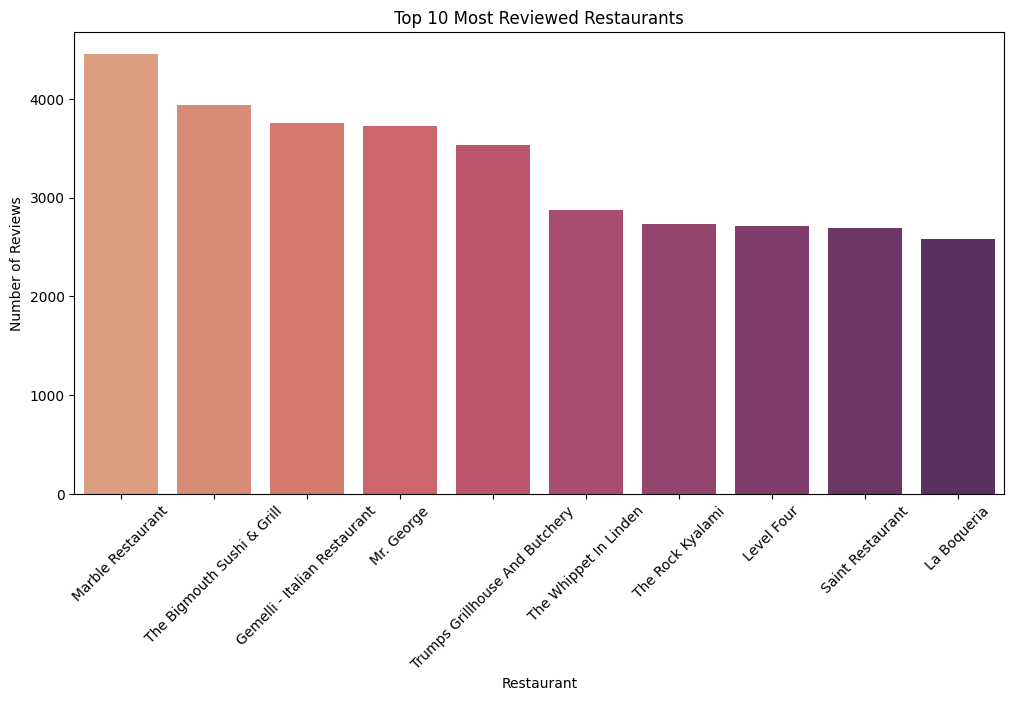

In [42]:
# Top 10 most reviewed restaurants
top_reviews = df[['Restaurant Name', 'Review_Count']].sort_values(by='Review_Count', ascending=False)[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=top_reviews['Restaurant Name'], y=top_reviews['Review_Count'], palette="flare")
plt.xticks(rotation=45)
plt.xlabel("Restaurant")
plt.ylabel("Number of Reviews")
plt.title("Top 10 Most Reviewed Restaurants")
plt.show()


In [43]:
df.to_excel("JHBcleaned.xlsx")
print("Excel file saved successfully!")

Excel file saved successfully!


In [ ]:
df.to_csv("JHBcleaned.csv")
print("Excel file saved successfully!")